# **Importing Required Libraries**

In [ ]:
!pip install emoji
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import json
import emoji
import regex
!pip install langdetect
from langdetect import detect
pd.set_option('display.max_colwidth',5000)  # setting the truncation limit for output
!pip install ktrain
import ktrain
from ktrain import text

     |████████████████████████████████| 133kB 12.4MB/s 
     |████████████████████████████████| 983kB 11.0MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-cp37-none-any.whl size=993242 sha256=0ef372a2d256bbd87e17c3165817299c52cddb572bcbe773577a4b4648abab54
  Stored in directory: /root/.cache/pip/wheels/7e/18/13/038c34057808931c7ddc6c92d3aa015cf1a498df5a70268996
Successfully built langdetect
     |████████████████████████████████| 25.3MB 118kB/s 
     |████████████████████████████████| 6.8MB 29.1MB/s 
     |████████████████████████████████| 266kB 36.5MB/s 
     |████████████████████████████████| 1.9MB 32.2MB/s 
     |████████████████████████████████| 1.2MB 34.0MB/s 
     |████████████████████████████████| 471kB 27.0MB/s 
     |████████████████████████████████| 3.3MB 32.4MB/s 
     |████████████████████████████████| 901kB 29.6MB/s 
  Created wheel for ktrain: filename=ktrain-0.26.3-cp37-none-any.whl size=25282390 sha256=1072a1b71903eb564debdff44207aca8c4fac177f60ac16d71f79

# **Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# **Reading the JSON Files**

In [ ]:
# reading reviews file 
'''
reviews = []
threshold = 5e6 #5 million reviews
with open('/content/drive/My Drive/FYP Datasets/yelp_academic_dataset_review.json') as fl:
    for i, line in enumerate(fl):
        reviews.append(json.loads(line)) #use 'loads' since line is string
        if i + 1 >= threshold:
            break
df_reviews = pd.DataFrame(reviews)
df_reviews = df_reviews[['text', 'stars','business_id']]
df_reviews.tail(10)

# reading buissness files
buisnisses = []
with open('/content/drive/My Drive/FYP Datasets/yelp_academic_dataset_business.json') as fl:
    for i, line in enumerate(fl):
        buisnisses.append(json.loads(line)) #use 'loads' since line is string
        if i + 1 >= threshold:
            break
df_buisnisses = pd.DataFrame(buisnisses)
df_buisnisses = df_reviews[['text', 'stars','business_id']]
df_buisnisses.tail(10)
'''

"\nreviews = []\nthreshold = 5e6 #5 million reviews\nwith open('/content/drive/My Drive/FYP Datasets/yelp_academic_dataset_review.json') as fl:\n    for i, line in enumerate(fl):\n        reviews.append(json.loads(line)) #use 'loads' since line is string\n        if i + 1 >= threshold:\n            break\ndf_reviews = pd.DataFrame(reviews)\ndf_reviews = df_reviews[['text', 'stars','business_id']]\ndf_reviews.tail(10)\n\n# reading buissness files\nbuisnisses = []\nwith open('/content/drive/My Drive/FYP Datasets/yelp_academic_dataset_business.json') as fl:\n    for i, line in enumerate(fl):\n        buisnisses.append(json.loads(line)) #use 'loads' since line is string\n        if i + 1 >= threshold:\n            break\ndf_buisnisses = pd.DataFrame(buisnisses)\ndf_buisnisses = df_reviews[['text', 'stars','business_id']]\ndf_buisnisses.tail(10)\n"

# **Converting JSON Files into CSV**

In [ ]:
'''
df_reviews.to_csv('/content/drive/My Drive/FYP Datasets/yelp_academic_dataset_review.csv',index=None) 
df_buisnisses.to_csv('/content/drive/My Drive/FYP Datasets/yelp_academic_dataset_business.csv',index=None) 
'''

"\ndf_reviews.to_csv('/content/drive/My Drive/FYP Datasets/yelp_academic_dataset_review.csv',index=None) \ndf_buisnisses.to_csv('/content/drive/My Drive/FYP Datasets/yelp_academic_dataset_business.csv',index=None) \n"

# **Reading CSV File**

In [ ]:
'''
df1=pd.read_csv('/content/drive/My Drive/FYP Datasets/yelp_academic_dataset_review.csv')
df=pd.read_csv('/content/drive/My Drive/FYP Datasets/yelp_academic_dataset_business.csv')
'''

"\ndf1=pd.read_csv('/content/drive/My Drive/FYP Datasets/yelp_academic_dataset_review.csv')\ndf=pd.read_csv('/content/drive/My Drive/FYP Datasets/yelp_academic_dataset_business.csv')\n"

# **Data Pre-procesing**

## **Hotels Dataset 1**

In [ ]:
'''
dataFrame1=pd.read_csv('/content/drive/My Drive/Hotels Dataset/7282_1.csv')
dataFrame1=dataFrame1.drop(['latitude','longitude','postalCode','province','reviews.date','reviews.dateAdded','reviews.doRecommend','reviews.doRecommend','reviews.id','reviews.userCity','reviews.username','reviews.userProvince'],axis=1)
dataFrame1.head(10)
'''

"\ndataFrame1=pd.read_csv('/content/drive/My Drive/Hotels Dataset/7282_1.csv')\ndataFrame1=dataFrame1.drop(['latitude','longitude','postalCode','province','reviews.date','reviews.dateAdded','reviews.doRecommend','reviews.doRecommend','reviews.id','reviews.userCity','reviews.username','reviews.userProvince'],axis=1)\ndataFrame1.head(10)\n"

## **Between January 2018 and September 2018**

In [ ]:
'''
dataFrame2=pd.read_csv('/content/drive/My Drive/Hotels Dataset/Datafiniti_Hotel_Reviews_Jun19.csv')
dataFrame2=dataFrame2.drop(['id','dateAdded','dateUpdated','primaryCategories','keys','latitude','longitude','postalCode','province','reviews.date','reviews.dateAdded','reviews.dateSeen','reviews.sourceURLs','reviews.userCity','reviews.userProvince','reviews.username','sourceURLs','websites'],axis=1)
dataFrame2.shape
'''

"\ndataFrame2=pd.read_csv('/content/drive/My Drive/Hotels Dataset/Datafiniti_Hotel_Reviews_Jun19.csv')\ndataFrame2=dataFrame2.drop(['id','dateAdded','dateUpdated','primaryCategories','keys','latitude','longitude','postalCode','province','reviews.date','reviews.dateAdded','reviews.dateSeen','reviews.sourceURLs','reviews.userCity','reviews.userProvince','reviews.username','sourceURLs','websites'],axis=1)\ndataFrame2.shape\n"

## **Between December 2018 and May 2019**

In [ ]:
'''
dataFrame3=pd.read_csv('/content/drive/My Drive/Hotels Dataset/Datafiniti_Hotel_Reviews.csv')
dataFrame3=dataFrame3.drop(['id','dateAdded','dateUpdated','primaryCategories','keys','latitude','longitude','postalCode','province','reviews.date','reviews.dateSeen','reviews.sourceURLs','reviews.userCity','reviews.userProvince','reviews.username','sourceURLs','websites'],axis=1)
dataFrame3.shape
'''

"\ndataFrame3=pd.read_csv('/content/drive/My Drive/Hotels Dataset/Datafiniti_Hotel_Reviews.csv')\ndataFrame3=dataFrame3.drop(['id','dateAdded','dateUpdated','primaryCategories','keys','latitude','longitude','postalCode','province','reviews.date','reviews.dateSeen','reviews.sourceURLs','reviews.userCity','reviews.userProvince','reviews.username','sourceURLs','websites'],axis=1)\ndataFrame3.shape\n"

## **Merging Hotel Datasets**

In [ ]:
'''
datasets=[dataFrame1,dataFrame2,dataFrame3]
dataFrames=pd.concat(datasets)
dataFrames.shape
dataFrames.to_csv(r'/content/drive/My Drive/Hotels Dataset/Hotels.csv')
'''

"\ndatasets=[dataFrame1,dataFrame2,dataFrame3]\ndataFrames=pd.concat(datasets)\ndataFrames.shape\ndataFrames.to_csv(r'/content/drive/My Drive/Hotels Dataset/Hotels.csv')\n"

## **Reading Hotels CSV**

In [ ]:
df_hotel=pd.read_csv('/content/drive/My Drive/FYP Datasets/Hotels.csv',encoding='utf-8')
df_hotel.shape

(55889, 6)

## **Hotels Data Processing**

In [ ]:
# dropping extra coumns
'''
df_hotel=df_hotel.drop(['Unnamed: 0','city','country'],axis=1)
'''
# checking duplication of columns name
pd.value_counts(df_hotel.name=='name')
# no of hotels
hotel_names=df_hotel.name.unique()
# finding no of reviews for each hotel
no_of_reviews=df_hotel.name.value_counts()
# checking how many reviews are in english language of each hotels
[count for count in df_hotel.name.value_counts() ]
# creating a dataframe
pd.DataFrame({'No of Reviews':no_of_reviews})
#Dropping Null values
df_hotel = df_hotel[df_hotel['reviews.text'].notna()] 

## **Reviews Language Detection**

In [ ]:
language_list=[]
df_hotel.fillna('.',inplace=True)
for index,i in enumerate(df_hotel.loc[:,'reviews.text']):
    i=re.sub(r'http\S+', '', i)
    if (len(i)>1):
      if(((i[0]>='a' and i[0]<= 'z') or (i[0]>='A' and i[0]<='Z'))):
          language_list.append(detect(i))    
      else:
          language_list.append('none')
    else:
       language_list.append('none')

In [46]:
print(len(language_list))
df_hotel["language"]=language_list
df_hotel[['reviews.text','language']]

55889


,reviews.text,language
0,Pleasant 10 min walk along the sea front to the Water Bus. restaurants etc. Hotel was comfortable breakfast was good - quite a variety. Room aircon didn't work very well. Take mosquito repelant!,en
1,Really lovely hotel. Stayed on the very top floor and were surprised by a Jacuzzi bath we didn't know we were getting! Staff were friendly and helpful and the included breakfast was great! Great location and great value for money. Didn't want to leave!,en
2,Ett mycket bra hotell. Det som drog ner betyget var att vi fick ett rum under taksarna dr det endast var full sthjd i 80 av rummets yta.,sv
3,"We stayed here for four nights in October. The hotel staff were welcoming, friendly and helpful. Assisted in booking tickets for the opera. The rooms were clean and comfortable- good shower, light and airy rooms with windows you could open wide. Beds were comfortable. Plenty of choice for breakfast.Spa at hotel nearby which we used while we were there.",en
4,"We stayed here for four nights in October. The hotel staff were welcoming, friendly and helpful. Assisted in booking tickets for the opera. The rooms were clean and comfortable- good shower, light and airy rooms with windows you could open wide. Beds were comfortable. Plenty of choice for breakfast.Spa at hotel nearby which we used while we were there.",en
...,...,...
55884,"It is hard for me to review an oceanfront hotel. I go for the ocean and not necessarily the hotel. While this place is definitely far above average, there are just a couple of things that need mentioning. Firat the good. Very very accomodating. The staff was versatile and seemed eager to please. Our room was very clean and modern... More",en
55885,"I live close by, and needed to stay somewhere for a night due to renovation work at home. I called at 9:30 PM, and they had a room available. It was clean, comfortable, and quiet. The bed was very comfortable, and we had a sound night's sleep. The check in was smooth, and seeing wild turkeys in he tree out... More",en
55886,Rolled in 11:30 laid out heads down woke up to continental breakfast and rolled out at daybreak. It is under construction but heat they have done so far is beautiful. Very nice updated pool area for an older motel. The staff was super nice,en
55887,Absolutely terrible..I was told I was being given a Non smoking room. I walked in and it smelled of smoke with a ash tray sitting on table. Checked in late. Smoke is miserable..checking out as I type. Police were in parking lot as I was pulling in. People walking through parking lot heading back to houses in back of hotel..Avoid... More,en


## **Null Values in Businiss File**

In [ ]:
df=pd.read_csv('/content/drive/My Drive/FYP Datasets/yelp_academic_dataset_business.csv')
df['categories'].isna().mean() # missing values mean


0.002502471429321897

## **Removing Buisniss file null rows**

In [ ]:
df = df[df['categories'].notna()] # take out missing ones
df.shape

(208869, 14)

## **Splitting Categories**

In [ ]:
import re
cat_temp1 = ';'.join(df['categories'])
cat_temp2 = re.split(';|,', cat_temp1)
bus_cat_trim = [item.lstrip() for item in cat_temp2]
df_bus_cat = pd.DataFrame(bus_cat_trim,columns=['category'])


## **Visualizing the Businiss Categories**

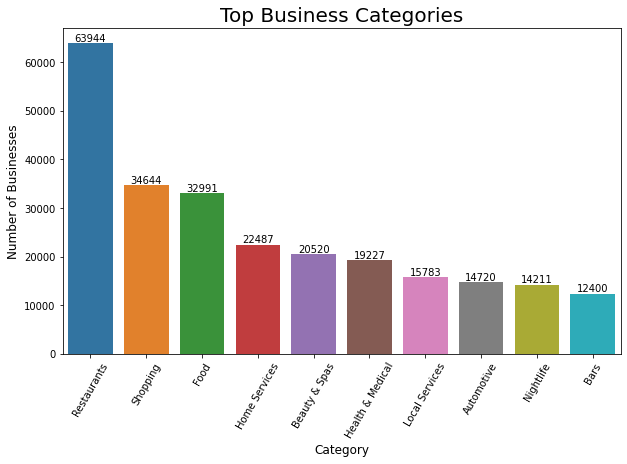

In [ ]:
bus_cat_count = df_bus_cat.category.value_counts()
bus_cat_count = bus_cat_count.sort_values(ascending = False)
bus_cat_count = bus_cat_count.iloc[0:10]

# plot
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(bus_cat_count.index, bus_cat_count.values)
plt.title("Top Business Categories",fontsize = 20)
x_locs,x_labels = plt.xticks()
plt.setp(x_labels, rotation = 60)
plt.ylabel('Number of Businesses', fontsize = 12)
plt.xlabel('Category', fontsize = 12)

#text labels
r = ax.patches
labels = bus_cat_count.values
for rect, label in zip(r, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 10, label, ha='center', va='bottom')

## **Resturants Category**

In [ ]:
'''
df_bus_res = df.loc[[i for i in df['categories'].index if re.search('Restaurants', df['categories'][i])]]
df_bus_res=df_bus_res.drop(['postal_code','latitude','longitude','is_open','hours','state','attributes'],axis=1)
df_bus_res[df_bus_res.business_id=="yU3p0tEBtGuZLTcsBHw9uQ"]
'''

'\ndf_bus_res = df.loc[[i for i in df[\'categories\'].index if re.search(\'Restaurants\', df[\'categories\'][i])]]\ndf_bus_res=df_bus_res.drop([\'postal_code\',\'latitude\',\'longitude\',\'is_open\',\'hours\',\'state\',\'attributes\'],axis=1)\ndf_bus_res[df_bus_res.business_id=="yU3p0tEBtGuZLTcsBHw9uQ"]\n'

## **Extracting the reviews for Resturants**

In [ ]:
'''
df8=pd.DataFrame(columns=['text', 'stars', 'business_id', 'name', 'address', 'review_count','categories'])
for index, row in df_bus_res.iloc[:10000,:].iterrows():
  global df8
  df4=df1[df1.business_id==row['business_id']]
  df4['name']=row['name']
  df4['address']=row['address']
  df4['review_count']=row['review_count']
  df4['categories']=row['categories']
  df8=df8.append(df4,ignore_index=True)
df8.iloc[:215257,:].to_csv('/content/drive/My Drive/FYP Datasets/Mini_Resturant.csv', index = False)
'''

"\ndf8=pd.DataFrame(columns=['text', 'stars', 'business_id', 'name', 'address', 'review_count','categories'])\nfor index, row in df_bus_res.iloc[:10000,:].iterrows():\n  global df8\n  df4=df1[df1.business_id==row['business_id']]\n  df4['name']=row['name']\n  df4['address']=row['address']\n  df4['review_count']=row['review_count']\n  df4['categories']=row['categories']\n  df8=df8.append(df4,ignore_index=True)\ndf8.iloc[:215257,:].to_csv('/content/drive/My Drive/FYP Datasets/Mini_Resturant.csv', index = False)\n"

## **Shopping Category**

In [ ]:
'''
df_bus_shop = df.loc[[i for i in df['categories'].index if re.search('Shopping', df['categories'][i])]]
df_bus_shop=df_bus_shop.drop(['postal_code','latitude','longitude','is_open','hours','state','attributes'],axis=1)
df_bus_shop.head(5)
'''

"\ndf_bus_shop = df.loc[[i for i in df['categories'].index if re.search('Shopping', df['categories'][i])]]\ndf_bus_shop=df_bus_shop.drop(['postal_code','latitude','longitude','is_open','hours','state','attributes'],axis=1)\ndf_bus_shop.head(5)\n"

## **Extracting the reviews for Shopping**

In [ ]:
'''
df8=pd.DataFrame(columns=['text', 'stars', 'business_id', 'name', 'address', 'review_count','categories'])
for index, row in df_bus_shop.iloc[:12000,:].iterrows():
  global df8
  df4=df1[df1.business_id==row['business_id']]
  df4['name']=row['name']
  df4['address']=row['address']
  df4['review_count']=row['review_count']
  df4['categories']=row['categories']
  df8=df8.append(df4,ignore_index=True)
df8.to_csv('Medical_Data.csv', index = False)
df8.shape[0]
'''

"\ndf8=pd.DataFrame(columns=['text', 'stars', 'business_id', 'name', 'address', 'review_count','categories'])\nfor index, row in df_bus_shop.iloc[:12000,:].iterrows():\n  global df8\n  df4=df1[df1.business_id==row['business_id']]\n  df4['name']=row['name']\n  df4['address']=row['address']\n  df4['review_count']=row['review_count']\n  df4['categories']=row['categories']\n  df8=df8.append(df4,ignore_index=True)\ndf8.to_csv('Medical_Data.csv', index = False)\ndf8.shape[0]\n"

## **Medical & Health Category**

In [ ]:
'''
df_bus_med = df.loc[[i for i in df['categories'].index if re.search('Health & Medical', df['categories'][i])]]
df_bus_med=df_bus_med.drop(['postal_code','latitude','longitude','is_open','hours','state','attributes'],axis=1)
df_bus_med.head(5)
'''

"\ndf_bus_med = df.loc[[i for i in df['categories'].index if re.search('Health & Medical', df['categories'][i])]]\ndf_bus_med=df_bus_med.drop(['postal_code','latitude','longitude','is_open','hours','state','attributes'],axis=1)\ndf_bus_med.head(5)\n"

## **Extracting Reviews for Medical & Health**

In [ ]:
'''
df8=pd.DataFrame(columns=['text', 'stars', 'business_id', 'name', 'address', 'review_count','categories'])
for index, row in df_bus_med.iloc[:20000,:].iterrows():
  global df8
  df4=df1[df1.business_id==row['business_id']]
  df4['name']=row['name']
  df4['address']=row['address']
  df4['review_count']=row['review_count']
  df4['categories']=row['categories']
  df8=df8.append(df4,ignore_index=True)
df8.to_csv('Medical_Data.csv', index = False)
df8.shape[0]
'''

"\ndf8=pd.DataFrame(columns=['text', 'stars', 'business_id', 'name', 'address', 'review_count','categories'])\nfor index, row in df_bus_med.iloc[:20000,:].iterrows():\n  global df8\n  df4=df1[df1.business_id==row['business_id']]\n  df4['name']=row['name']\n  df4['address']=row['address']\n  df4['review_count']=row['review_count']\n  df4['categories']=row['categories']\n  df8=df8.append(df4,ignore_index=True)\ndf8.to_csv('Medical_Data.csv', index = False)\ndf8.shape[0]\n"

## **Reading Buisnisses CSV's Data**

In [ ]:
df_res=pd.read_csv('/content/drive/My Drive/FYP Datasets/Mini_Resturant.csv')

df_med=pd.read_csv('/content/drive/My Drive/FYP Datasets/Medical & Health.csv')

df_shop=pd.read_csv('/content/drive/My Drive/FYP Datasets/Shopping.csv')


## **Emoji's Processing**

In [ ]:
# finding emoticons from uni codes in th dataset

def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI["en"] for char in word):
            emoji_list.append(word)
    return emoji_list

In [ ]:
print('emojis in Medical Dataset')
for index, row in df_med.iterrows():
    emojis=split_count(row['reviews.text'])
    list=[emoji for emoji in emojis]
    if len(list)>0:
      print(list,index)


print('emojis in Shopping Dataset')
for index, row in df_shop.iterrows():
    emojis=split_count(row['reviews.text'])
    list=[emoji for emoji in emojis]
    if len(list)>0:
      print(list,index)


print('emojis in Resturant Dataset')
for index, row in df_res.iterrows():
    emojis=split_count(row['reviews.text'])
    list=[emoji for emoji in emojis]
    if len(list)>0:
      print(list,index)


print('emojis in Hotels Dataset')
for index, row in df_hotel.iterrows():
    emojis=split_count(row['reviews.text'])
    list=[emoji for emoji in emojis]
    if len(list)>0:
      print(list,index)


emojis in Medical Dataset
['®'] 3600
['™'] 8829
['‼'] 12512
['‼'] 13127
['‼'] 13314
['⁉'] 35727
['‼'] 44682
['‼'] 52082
['‼', '‼'] 59600
['‼'] 61974
['‼'] 80022
['‼'] 81770
['®'] 98018
['™'] 98527
['®'] 100562
['‼'] 102600
['‼'] 109643
['‼'] 115608
['™'] 143409
['‼', '‼', '‼'] 151548
['‼'] 151723
['®'] 156514
['®'] 156521
['‼'] 166097
['‼'] 167809
['‼', '‼', '‼', '‼', '‼', '‼'] 175023
['‼', '‼'] 179244
['‼'] 179256
['®'] 181602
['‼', '‼', '‼'] 189084
emojis in Shopping Dataset
['™'] 97
['®'] 8695
['™'] 10720
['™'] 17291
['®'] 18855
['™'] 30673
['‼', '‼', '‼'] 33976
['‼', '‼', '‼', '‼'] 37686
['®'] 39160
['‼'] 44247
['‼'] 44630
['‼'] 46629
['™'] 47016
['‼'] 49246
['‼'] 49931
['®'] 51730
['®', '®'] 53519
['™'] 53857
['®'] 55210
['®'] 57388
['™'] 60330
['®', '®'] 67742
['®', '®'] 75790
['ℹ'] 76515
['™'] 89193
['‼'] 96945
['™'] 97615
['‼'] 101013
['®'] 102033
['®'] 102492
['‼'] 104517
['‼', '‼'] 119887
['™'] 125384
['‼', '‼', '‼'] 128218
['®', '®', '®', '®', '®', '®', '®'] 133735
['‼'] 152

## **Emoticon Processing**

In [ ]:
# selecting generic emoticon from library and checing their occurence
# in the yelp dataset

def getEmiticon(row):
    if re.search(re.escape(':)'),row['reviews.text']):
      return ':)'
    elif re.search(re.escape(':-)'),row['reviews.text']):
      return ':-)'
    elif re.search(re.escape(':('),row['reviews.text']):
      return ':(' 
    elif re.search(re.escape(':p'),row['reviews.text']):
      return ':p'
    elif re.search(re.escape(':-('),row['reviews.text']):
      return ':-(' 
    elif re.search(re.escape(';)'),row['reviews.text']):
      return ';)'
    elif re.search(re.escape(';('),row['reviews.text']):
      return ';('
    elif re.search(re.escape(';-('),row['reviews.text']):
      return ';-(' 
    elif re.search(re.escape(';-)'),row['reviews.text']):
      return ';-)'
    else:
      return 'none'



In [ ]:
df_res['emiticon']=''
for index, row in df_res.iloc[:,:].iterrows():
  df_res['emiticon'][index]=getEmiticon(row)

df_med['emiticon']=''
for index, row in df_med.iloc[:,:].iterrows():
  df_med['emiticon'][index]=getEmiticon(row)

df_shop['emiticon']=''
for index, row in df_shop.iloc[:,:].iterrows():
  df_shop['emiticon'][index]=getEmiticon(row)

df_hotel['emiticon']=''
for index, row in df_hotel.iloc[:,:].iterrows():
  df_hotel['emiticon'][index]=getEmiticon(row)

print(df_res)
print(df_med)
print(df_shop)
print(df_hotel)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added b

                     address  ... emiticon
0             404 E Green St  ...     none
1             404 E Green St  ...     none
2             404 E Green St  ...     none
3             404 E Green St  ...     none
4             404 E Green St  ...     none
...                      ...  ...      ...
215252  2000 Fashion Show Dr  ...     none
215253  2000 Fashion Show Dr  ...     none
215254  2000 Fashion Show Dr  ...     none
215255  2000 Fashion Show Dr  ...     none
215256  2000 Fashion Show Dr  ...     none

[215257 rows x 7 columns]
                                address  ... emiticon
0             8880 E Via Linda, Ste 107  ...     none
1             8880 E Via Linda, Ste 107  ...     none
2             8880 E Via Linda, Ste 107  ...     none
3             8880 E Via Linda, Ste 107  ...     none
4                       5229 S Power Rd  ...     none
...                                 ...  ...      ...
190118  1396 Don Mills Road, Suite 108B  ...     none
190119             4976 D

## **Saving Buisnisses Data Separately in CSV Files**

In [ ]:
'''
df_res.to_csv('Mini_Resturant.csv', index = False)
df_med.to_csv('Medical & Health.csv', index = False)
df_shop.to_csv('Shopping.csv', index = False)
df_hotel.to_csv('Hotels.csv', index = False)
'''

"\ndf_res.to_csv('Mini_Resturant.csv', index = False)\ndf_med.to_csv('Medical & Health.csv', index = False)\ndf_shop.to_csv('Shopping.csv', index = False)\ndf_hotel.to_csv('Hotels.csv', index = False)\n"

# **State of the Art Models For Sentiment Analysis**

## **1: Bert Model Using Ktrain**

### **Install IMDB Movies Reviews Dataset**

In [ ]:
!git clone https://github.com/laxmimerit/IMDB-Movie-Reviews-Large-Dataset-50k.git 

Cloning into 'IMDB-Movie-Reviews-Large-Dataset-50k'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


### **Read Train Data File**

In [ ]:
data_train=pd.read_excel('/content/IMDB-Movie-Reviews-Large-Dataset-50k/train.xlsx', dtype=str)

### **Read Test Data File**

In [ ]:
 data_test=pd.read_excel('/content/IMDB-Movie-Reviews-Large-Dataset-50k/test.xlsx', dtype=str)

### **Train Test Split**

In [ ]:
""" maximum length for paragraph or review is 500 words"""

(x_train,y_train ),(x_test,y_test),preprocess=text.texts_from_df(train_df=data_train,
                   text_column='Reviews',
                   label_columns='Sentiment',
                   val_df=data_test,
                   maxlen=500,
                   preprocess_mode='bert'
                   )

['neg', 'pos']
   neg  pos
0  1.0  0.0
1  1.0  0.0
2  1.0  0.0
3  1.0  0.0
4  1.0  0.0
['neg', 'pos']
   neg  pos
0  0.0  1.0
1  0.0  1.0
2  1.0  0.0
3  0.0  1.0
4  1.0  0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


### **Creating BERT Model**

In [ ]:
model=text.text_classifier(name='bert',
                           train_data=(x_train,y_train),
                           preproc=preprocess)

Is Multi-Label? False
maxlen is 500
done.


### **Setting up the Parameters**

In [ ]:
 learner=ktrain.get_learner(model=model,
                            train_data=(x_train,y_train),
                            val_data=(x_test,y_test),
                            batch_size=6)

In [ ]:
#To get optimal Learning Rate
#learner.lr_find()
#learner.lr_plot
#optimal learn rate is 2e-5

### **Fitting the Model**

In [ ]:
learner.fit_onecycle(lr=2e-5 , epochs=1)



begin training using onecycle policy with max lr of 2e-05...
4167/4167 [==============================] - ETA: 0s - loss: 0.2510 - accuracy: 0.8982

### **Making predictor to predict data**

In [42]:
predictor =ktrain.get_predictor(learner.model,preprocess)

In [45]:
data=["I love this service, a client had referred me and i haven t been disappointed yet. All their fruits and vegetables are fresh and keep well for the week. I have had 3 deliveries and all with different produce. The delivery method is very convenient for me as i am a very busy person and dont have the time to run around the city to look for the best possible produce. I would highly recommend front door organics to anyone who cares about what they eat. :)",
       "I usually buy sodastream refills at this location. Unfortunately, the last tank was sub par. It lasted a little bit more than half as long as usual so I started buying the tanks elsewhere. I happened to be in this shop to purchase another item and thought I would do them the courtesy of giving them my feedback as well as confirming if they were now refilling the tanks instead of selling the legitimate sodastream tanks. The lady at the desk confirmed that the tanks were now filled in-house but was quite defensive, saying at least 3 times that I was the only person with this complaint...which felt as though she was invalidating my feedback. I tried to explain that I was just trying to be helpful and that most people would not take the time or trouble...they would just write a bad review. She would not talk to me after that. Oh well;)",
      "Not a bad store the prices are again a little high for my liking, but I'm a cheap skate.They have a decent selection not a huge, but far amount of mixed genres. Store operator was nice. I would maybe go back after they get a dollar LP section ;).",
      "They have some good markdowns and prices here. The downside is that they have some funky colored polos and sweaters. Neon green anyone? Upside is that they still carry the traditional white and black colors, just not as heavily discounted. I managed to snag some cool kicks and a hat for only 10 bucks! :)"]

predictor.predict(data)

['pos', 'neg', 'neg', 'neg']

### **Saving and  testing the Model**

In [ ]:
predictor.save("/content/drive/MyDrive/bert_model_ktrain")

In [43]:
predict=ktrain.load_predictor("/content/drive/MyDrive/bert_model_ktrain")
predict.predict(data)

['pos', 'neg', 'neg', 'neg']